The aim of this experiment is simply to test that MS-RWM outperforms MS-RWM on the G and K example.

In [1]:
import numpy as np
from numpy.random import rand, randn
from numpy import ones, exp, log, diag, vstack, pi, array, r_, isfinite, logspace, zeros, eye, quantile
from numpy.linalg import norm, solve
from numpy.random import default_rng, choice, randint
from scipy.optimize import fsolve
from scipy.stats import multivariate_normal as MVN
from scipy.special import ndtri, ndtr
from scipy.stats import uniform as udist
from scipy.stats import norm as ndist
from scipy.linalg import block_diag

import time
from math import prod
from warnings import catch_warnings, filterwarnings, resetwarnings


import matplotlib.pyplot as plt
from matplotlib import rc
from ipywidgets.widgets import interact


from RWM import RWM
from Manifolds.Manifold import Manifold
from Manifolds.GKManifoldNew import GKManifold, data_generator, find_point_on_manifold, find_point_on_manifold_from_θ
from markov_snippets import MSAdaptiveTolerancesAdaptiveδ, MSAdaptiveTolerancesAdaptiveδSwitchIntegrator
from markov_snippets import SMCAdaptiveTolerancesAdaptiveδ
# from tangential_hug_functions import HugTangentialMultivariate
# from utils import ESS_univariate, prep_contour
from copy import deepcopy

# G and K settings

In [2]:
def generate_setting(m, B, δ, N, ϵ0=20, thinning=10, thug=True, verbose=True, initialization='init_RWMϵ0', burnin=100, δ0=0.01, kernel_type='uniform', ϵmin=1e-4, quantile_value=0.01, maxiter=50, ϵprop_switch=0.05, pmoved_switch=0.15, switch_strategy='ap', δmin=1e-4, δmax=100.0, ap_target=0.3, use_autograd=False, init_manifold_prior=True):
    """Generates an object from which one can grab the settings. This allows one to run multiple scenarios."""
    θ0        = array([3.0, 1.0, 2.0, 0.5])      # True parameter value on U(0, 10) scale.
    d         = 4 + m                            # Dimensionality of ξ=(θ, z)
    ystar     = data_generator(θ0, m, seed=1234) # Observed data
    q         = MVN(zeros(d), eye(d))            # Proposal distribution for THUG
    ξ0        = find_point_on_manifold_from_θ(ystar=ystar, θfixed=ndtri(θ0/10), ϵ=1e-5, maxiter=5000, tol=1e-15, kernel_type=kernel_type)
    resetwarnings()
    manifold  = GKManifold(ystar, kernel_type=kernel_type, use_autograd=use_autograd)
    if δ0 is None:
        δ0 = δ
    return {
        'θ0': θ0,
        'm' : m,
        'd' : d,
        'ystar': ystar,
        'q': q,
        'ξ0': ξ0,
        'B': B,
        'δ': δ,
        'N': N,
        'manifold': manifold,
        'thinning': thinning,
        'thug': thug,
        'verbose': verbose,
        'initialization': initialization,
        'burnin': burnin,
        'δ0': δ0,
        'kernel_type': kernel_type,
        'ϵmin': ϵmin,
        'quantile_value': quantile_value,
        'maxiter': maxiter,
        'ϵprop_switch': ϵprop_switch,
        'pmoved_switch': pmoved_switch,
        'switch_strategy': switch_strategy,
        'δmin': δmin,
        'δmax': δmax,
        'ap_target': ap_target,
        'ϵ0': ϵ0,
        'use_autograd': use_autograd,
        'init_manifold_prior': init_manifold_prior
    }

In [5]:
SETTINGS = generate_setting(
    m=50, 
    B=20, 
    δ=0.01, 
    N=5000, 
    thinning=10, 
    δ0=0.01, 
    kernel_type='uniform', 
    thug=False, 
    verbose=True, 
    initialization='init_prior', 
    burnin=100, 
    maxiter=100, 
    ϵmin=1e-8, 
    quantile_value=0.9,
    δmin=1e-3, 
    δmax=10.0, 
    ap_target=0.2
)

# SMC-RWM

In [6]:
SMC_RWM = SMCAdaptiveTolerancesAdaptiveδ(SETTINGS)
_ = SMC_RWM.sample()

Kernel: RWM.
Initializing particles from prior.
Initial Epsilon: {:.3f} 7714535797754.47
Iteration:  1
	Particles resampled.
	Epsilon: 655160424.777918
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.81420000
	Step-size adapted to: 0.01359477
Iteration:  2
	Particles resampled.
	Epsilon: 123666528.952347
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.75660000
	Step-size adapted to: 0.01795709
Iteration:  3
	Particles resampled.
	Epsilon: 29984766.918943
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.72640000
	Step-size adapted to: 0.02336374
Iteration:  4
	Particles resampled.
	Epsilon: 8907587.134207
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.69960000
	Step-size adapted to: 0.02999363
Iteration:  5
	Particles resampled.
	Epsilon: 1764714.777835
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.70060000
	Step-size adapted to: 0.03852414
Iteration:  6
	Particles resampled.
	Epsi

	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.04700000
	Step-size adapted to: 0.77153736
Iteration:  50
	Particles resampled.
	Epsilon: 20.772332
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.04180000
	Step-size adapted to: 0.71286003
Iteration:  51
	Particles resampled.
	Epsilon: 20.502106
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.04780000
	Step-size adapted to: 0.66062417
Iteration:  52
	Particles resampled.
	Epsilon: 20.303882
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.03480000
	Step-size adapted to: 0.60824946
Iteration:  53
	Particles resampled.
	Epsilon: 20.141447
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.03680000
	Step-size adapted to: 0.56058736
Iteration:  54
	Particles resampled.
	Epsilon: 20.002283
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.04060000
	Step-size adapted to: 0.51764263
Iteration:  55
	Particles resampled.
	Epsil

	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.08940000
	Step-size adapted to: 0.01007427
Iteration:  99
	Particles resampled.
	Epsilon: 19.228944
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.11920000
	Step-size adapted to: 0.00967539
Iteration:  100
	Particles resampled.
	Epsilon: 19.179535
	Weights computed and normalised.
	Mutation step done.
	Approx AP: 0.12340000
	Step-size adapted to: 0.00931182


# Markov Snippets RWM with adaptive step size

In [126]:

class MSAdaptiveTolerancesAdaptiveδ:

    def __init__(self, SETTINGS):
        """Markov Snippets sampler that can choose between THUG or RWM integrators.
        The sequence of target distributions is NOT fixed here. It is adaptively
        chosen based on the  distribution of distances at the previous round, i.e.
        we choose a small quantile of all the distances.
        The step size is chosen adaptively like in a standard SMC sampler (a la
        Chang) using the proxy for the acceptance probability.

        Tolerances
        ----------
        Adaptively chosen.

        Initialization
        --------------
        We allow for multiple initialization procedures.
            1. init_RWMϵ0:  Starting from x0 ∈ Manifold, sample from ηϵ0 using RWM
                            with some thinning and some burn-in.
            2. init_THUGϵ0: Starting from x0 ∈ Manifold, sample from ηϵ0 using THUG
                            with some thinning and some burn-in.
            3. init_prior: Sample from the prior.

        Parameters
        ----------

        :param SETTINGS: Dictionary containing various variables necessary for
                         running the Markov Snippets algorithm.
        :type SETTINGS: dict
        """
        # Store variables
        self.N  = SETTINGS['N']       # Number of particles
        self.B  = SETTINGS['B']       # Number of integration steps
        self.δ  = SETTINGS['δ']       # Step-size for each integration step
        self.d  = SETTINGS['d']       # Dim of x-component of particle
        self.manifold = SETTINGS['manifold']
        self.SETTINGS = SETTINGS
        self.thug     = SETTINGS['thug']
        self.verbose = SETTINGS['verbose']
        self.verboseprint = print if self.verbose else lambda *a, **k: None
        self.initialization = SETTINGS['initialization']
        self.ϵmin = SETTINGS['ϵmin']
        self.maxiter = SETTINGS['maxiter']
        self.quantile_value = SETTINGS['quantile_value']
        self.ap_target = SETTINGS['ap_target']  # target acceptance probability used to adapt δ
        self.δmin = SETTINGS['δmin']
        self.δmax = SETTINGS['δmax'] # both used for adaptation
        self.init_manifold_prior = SETTINGS['init_manifold_prior']

        # Check arguments
        assert isinstance(self.N,  int), "N must be an integer."
        assert isinstance(self.B, int), "B must be an integer."
        assert isinstance(self.δ, float), "δ must be a float."
        assert isinstance(self.d, int), "d must be an integer."
        assert isinstance(self.thug, bool), "thug must be boolean variable."
        assert isinstance(self.initialization, str), "initialization must be a string."
        assert isinstance(self.ϵmin, float), "ϵmin must be a float."
        assert isinstance(self.maxiter, int), "maxiter must be an integer."
        assert isinstance(self.quantile_value, float), "quantile_value must be float."
        assert self.quantile_value >= 0 and self.quantile_value <= 1, "quantile value must be in [0, 1]."
        assert isinstance(self.ap_target, float), "ap_target must be float."
        assert self.ap_target >= 0 and self.ap_target <= 1, "ap_target must be in [0, 1]."
        assert isinstance(self.δmin, float), "δmin must be float."
        assert isinstance(self.δmax, float), "δmax, must be float."
        assert (0 <= self.δmin) and (self.δmin <= self.δmax), "step sizes must be positive and ordered."



        # Initialize the arrays storing ϵ and logηϵ as empty. If we initialize
        # from a small ϵ0 then we add it (and the corresponding logηϵ0) to the
        # list below. Otherwise, we consider it -np.inf and use the prior instead.
        self.ϵs     = []
        self.log_ηs = []
        self.δs     = [SETTINGS['δ']]

        # Choose correct integrator based on user input
        if self.thug:
            self.verboseprint("Integrator: THUG.")
            self.ψ = generate_THUGIntegrator(self.B, self.δ, self.manifold.fullJacobian)
            self.ψ_generator = lambda B, δ: generate_THUGIntegrator(B, δ, self.manifold.fullJacobian)
        else:
            self.verboseprint("Integrator: RWM.")
            self.ψ = generate_RWMIntegrator(self.B, self.δ)
            self.ψ_generator = generate_RWMIntegrator

        # Choose initialization procedure
        if self.initialization == 'init_RWMϵ0':
            self.initializer = init_RWMϵ0
            self.ϵs.append(SETTINGS['ϵ0'])
            self.log_ηs.append(FilamentaryDistribution(self.manifold.generate_logηϵ, self.ϵs[0]))
        elif self.initialization == 'init_THUGϵ0':
            self.initializer = init_THUGϵ0
            self.ϵs.append(SETTINGS['ϵ0'])
            self.log_ηs.append(FilamentaryDistribution(self.manifold.generate_logηϵ, self.ϵs[0]))
        elif self.initialization == 'init_prior':
            self.initializer = init_prior
            # self.ϵs.append(-np.inf)
            # self.log_ηs.append(FilamentaryDistribution(self.manifold.generate_logprior, -np.inf))
        elif self.initialization == 'init_on_manifold':
            self.initializer = init_on_manifold
            if self.init_manifold_prior:
                self.ϵs.append(-np.inf)
                self.log_ηs.append(FilamentaryDistribution(self.manifold.generate_logprior, -np.inf))
            else:
                self.ϵs.append(SETTINGS['ϵ0'])
                self.log_ηs.append(FilamentaryDistribution(self.manifold.generate_logηϵ, self.ϵs[0]))
        else:
            raise ValueError("Initializer must be one of three options.")

    def initialize_particles(self):
        """Initializes based on the user input. 3 options available, see docs."""
        z0 = self.initializer(self)
        return z0

    def compute_weights_safely(self, log_μnm1_z, log_μn_ψk_z):
        """Safely computes the weights."""
        if False: #self.SETTINGS['kernel_type']  == 'uniform':
#             # Sanity checks
#             assert len(unique(log_μnm1_z)) == 1, "There should be only one value in log_μnm1_z."
#             assert abs(unique(log_μnm1_z)[0]) < np.inf, "Unique value in log_μnm1_z should be finite."
#             assert len(unique(log_μn_ψk_z)) == 2, "There should be only two values in log_μn_ψk_z."
#             # in log_μn_ψk_z one value should be -np.inf, and the other should be finite
#             assert sum(unique(log_μn_ψk_z) == -np.inf) == 1, "One value should be -np.inf in log_μn_ψk_z."
#             assert sum(abs(unique(log_μn_ψk_z)) < np.inf) == 1, "One value should be finite in log_μn_ψk_z."
#             # we must have that the finite value of log_μn_ψk_z is larger than the finite value of log_μnm1_z
#             assert unique(log_μn_ψk_z)[unique(log_μn_ψk_z) > -np.inf][0] >= unique(log_μnm1_z)[unique(log_μnm1_z) > -np.inf][0], "Finite value of log_μn_ψk_z should be larger than finite value of log_μnm1_z."
#             # If all these conditions are true, then it's simple: we just set the weight to 0 when log_μn_ψk_z
#             # is -np.inf, otherwise we set it to 1 / number of non inf.
#             w = zeros(self.N * (self.B + 1))
#             w[log_μn_ψk_z.flatten() != -np.inf] = 1
#             W = w / w.sum()
#             return W
            pass
        else:
            
#             W = exp(log_μn_ψk_z - log_μnm1_z)                                            # (N, B+1)
#             #### Normalize weights
#             W = W / W.sum()
#             return W
            logW    = log_μn_ψk_z - log_μnm1_z
            logsumW = logsumexp(logW)
            return exp(logW - logsumW)

    def sample(self):
        """Starts the Markov Snippets sampler."""
        starting_time = time()
        ## Storage
        #### Store z_n^{(i)}
        self.ZN  = zeros((1, self.N, 2*self.d))
        #### Store z_{n, k}^{(i)} so basically all the N(T+1) particles
        self.ZNK  = zeros((1, self.N*(self.B+1), 2*self.d))
        self.Wbar = zeros(self.N*(self.B+1))
        self.DISTANCES = zeros(self.N) #zeros(self.N*(self.B+1))
        self.ESS  = [self.N]
        self.K_RESAMPLED = zeros(self.N)
        # Store proxy metrics for acceptance probabilities
        self.prop_moved = [] # Stores the proportion of particles with k >= 1
        # Initialize particles
        z = self.initialize_particles()   # (N, 2d)
        self.ZN[0] = z
        # If initializing from the prior, we need to find ϵmax and set ϵ0 to it
        if self.initialization == 'init_prior':
            # compute distances
            distances = norm(apply_along_axis(self.manifold.q, 1, z[:, :self.d]), axis=1)
            self.ϵmax      = np.max(distances)
            self.ϵs.append(self.ϵmax)
            self.log_ηs.append(FilamentaryDistribution(self.manifold.generate_logηϵ, self.ϵmax))
            print("Setting initial epsilon to ϵmax= {:.10f}".format(self.ϵmax))
        # Keep running until an error arises or we reach ϵ_min
        n = 1
        try:
            while (n <= self.maxiter) or abs(self.ϵs[-1]) <= self.ϵmin:
                self.verboseprint("Iteration: ", n)
                # Compute trajectories
                Z = apply_along_axis(self.ψ, 1, z)                                        # (N, B+1, 2d)
                self.ZNK = vstack((self.ZNK, Z.reshape(1, self.N*(self.B+1), 2*self.d)))  # (N(B+1), 2d)
                self.verboseprint("\tTrajectories constructed.")

                # Adaptively choose ϵ
                distances = norm(apply_along_axis(self.manifold.q, 1, z[:, :self.d]), axis=1)
                self.DISTANCES = vstack((self.DISTANCES, distances))
                ϵ = clip(quantile(unique(distances), self.quantile_value), self.ϵmin, self.ϵmax)
                # ϵ = max(self.ϵmin, quantile(unique(distances), self.quantile_value))
                self.ϵs.append(ϵ)
                self.log_ηs.append(FilamentaryDistribution(self.manifold.generate_logηϵ, ϵ))
                self.verboseprint("\tEpsilon: {:.6f}".format(ϵ))

                # Compute weights.
                #### Log-Denominator: shared for each point in the same trajectory
                log_μnm1_z  = apply_along_axis(self.log_ηs[-2], 1, Z[:, 0, :self.d])        # (N, )
                log_μnm1_z  = repeat(log_μnm1_z, self.B+1, axis=0).reshape(self.N, self.B+1) # (N, B+1)
                #### Log-Numerator: different for each point on a trajectory.
                log_μn_ψk_z = apply_along_axis(self.log_ηs[-1], 2, Z[:, :, :self.d])          # (N, B+1)
                #### Put weights together
                # W = exp(log_μn_ψk_z - log_μnm1_z)                                            # (N, B+1)
                # #### Normalize weights
                # W = W / W.sum()
                W = self.compute_weights_safely(log_μnm1_z, log_μn_ψk_z)
                self.verboseprint("\tWeights computed and normalized.")
                # store weights (remember these are \bar{w})
                self.Wbar = vstack((self.Wbar, W.flatten()))
                # compute ESS
                self.ESS.append(1 / np.sum(W**2))
                # Resample down to N particles
                resampling_indeces = choice(a=arange(self.N*(self.B+1)), size=self.N, p=W.flatten())
                unravelled_indeces = unravel_index(resampling_indeces, (self.N, self.B+1))
                self.K_RESAMPLED = vstack((self.K_RESAMPLED, unravelled_indeces[1]))
                indeces = dstack(unravelled_indeces).squeeze()
                z = vstack([Z[tuple(ix)] for ix in indeces])     # (N, 2d)
                self.verboseprint("\tParticles Resampled.")

                # Rejuvenate velocities of N particles
                z[:, self.d:] = normal(loc=0.0, scale=1.0, size=(self.N, self.d))
                self.ZN = vstack((self.ZN, z[None, ...]))
                self.verboseprint("\tVelocities refreshed.")

                # Compute proxy acceptance probabilities
                self.prop_moved.append(sum(self.K_RESAMPLED[-1] >= 1) / self.N)
                self.verboseprint("\tProp Moved: {:.3f}".format(self.prop_moved[-1]))

                # Adapt δ based on proxy acceptance probability
                self.δ = clip(exp(log(self.δ) + 0.5*(self.prop_moved[-1] - self.ap_target)), self.δmin, self.δmax)
                self.δs.append(self.δ)
                self.ψ = self.ψ_generator(self.B, self.δ)
                self.verboseprint("\tStep-size adapted to: {:.8f}".format(self.δ))

                n += 1
            self.total_time = time() - starting_time
        except ValueError as e:
            print("ValueError was raised: ", e)
        return z

In [127]:
MS_RWM = MSAdaptiveTolerancesAdaptiveδ(SETTINGS)
_ = MS_RWM.sample()

Integrator: RWM.
Initializing particles from prior.
Setting initial epsilon to ϵmax= 197315174179431.9375000000
Iteration:  1
	Trajectories constructed.
	Epsilon: 535545176.759339
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.952
	Step-size adapted to: 0.01456156
Iteration:  2
	Trajectories constructed.
	Epsilon: 63343996.204371
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.951
	Step-size adapted to: 0.02120178
Iteration:  3
	Trajectories constructed.
	Epsilon: 13634300.893945
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.951
	Step-size adapted to: 0.03085766
Iteration:  4
	Trajectories constructed.
	Epsilon: 2777233.233607
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.950
	Step-size adapted to: 0.04489314
Iteration:  5
	Trajectories constructed.
	Epsilon: 635776.218007
	Weights computed and norma

	Trajectories constructed.
	Epsilon: 22.139016
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.120
	Step-size adapted to: 8.15462371
Iteration:  44
	Trajectories constructed.
	Epsilon: 21.654748
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.133
	Step-size adapted to: 7.88754626
Iteration:  45
	Trajectories constructed.
	Epsilon: 21.253708
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.104
	Step-size adapted to: 7.51939057
Iteration:  46
	Trajectories constructed.
	Epsilon: 20.906120
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.076
	Step-size adapted to: 7.06805328
Iteration:  47
	Trajectories constructed.
	Epsilon: 20.622820
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.080
	Step-size adapted to: 6.65511075
Iteration:  48
	Trajectories constructed.
	Ep

	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.022
	Step-size adapted to: 0.42929330
Iteration:  86
	Trajectories constructed.
	Epsilon: 19.416840
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.052
	Step-size adapted to: 0.39863267
Iteration:  87
	Trajectories constructed.
	Epsilon: 19.416774
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.044
	Step-size adapted to: 0.36864730
Iteration:  88
	Trajectories constructed.
	Epsilon: 19.416704
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.018
	Step-size adapted to: 0.33654786
Iteration:  89
	Trajectories constructed.
	Epsilon: 19.416658
	Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.042
	Step-size adapted to: 0.31104586
Iteration:  90
	Trajectories constructed.
	Epsilon: 19.416622
	Weights computed and normaliz

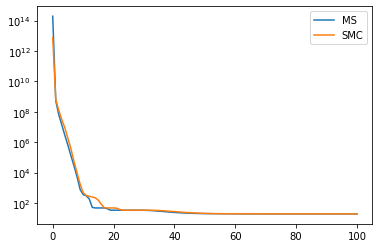

In [128]:
fig, ax = plt.subplots()
ax.plot(MS_RWM.ϵs, label='MS')
ax.plot(SMC_RWM.ϵs, label='SMC')
ax.set_yscale('log')
ax.legend()
plt.show()